In [1]:

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Define paths for datasets
train_path = '/content/drive/MyDrive/signDataset/images.cv_smo35iz2zgxsc6iky5nb/data/train'
val_path = '/content/drive/MyDrive/signDataset/images.cv_smo35iz2zgxsc6iky5nb/data/val'
test_path = '/content/drive/MyDrive/signDataset/images.cv_smo35iz2zgxsc6iky5nb/data/test'


In [5]:

# Data Augmentation
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [6]:
# Load training data
train_data_gen = image_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 144 images belonging to 1 classes.


In [7]:
# Load validation data
val_data_gen = image_gen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 21 images belonging to 1 classes.


In [8]:
# Load testing data
test_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 65 images belonging to 1 classes.


In [9]:


# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/My Drive/stop_sign_model.h5', monitor='val_loss', save_best_only=True, verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 5.1657e-10 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.00000, saving model to /content/drive/My Drive/stop_sign_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 9s 2s/step - loss: 5.1657e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 5.9209e-15 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.00000
5/5 [==============================] - 2s 415ms/step - loss: 5.9209e-15 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 2.1008e-27 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.00000
5/5 [==============================] - 2s 447ms/step - loss: 2.1008e-27 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - ETA: 0s - loss: 2.3085e-23 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 0.00000
5/5 [==============================] - 1s 293ms/step - loss: 2.3085e-23 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============

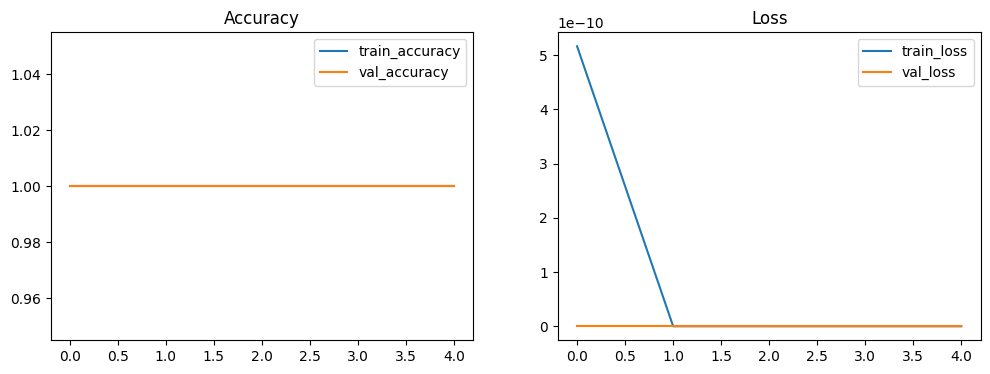

In [11]:

# Train the model
history = model.fit(
    train_data_gen,
    epochs=5,
    validation_data=val_data_gen,
    callbacks=[early_stop, checkpoint]
)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()


In [14]:
# Replace with the correct path to your .h5 file
model.load_weights('/content/drive/My Drive/stop_sign_model.h5')

In [15]:


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data_gen)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


3/3 [==============================] - 13s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%


In [16]:

# Predict on new images
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        return 'No Stop Sign'
    else:
        return 'Stop Sign'


In [21]:
from PIL import Image

import matplotlib.pyplot as plt

In [23]:

def show_image(img_path):
    """Displays an image."""
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 17ms/step
The model predicts: Stop Sign


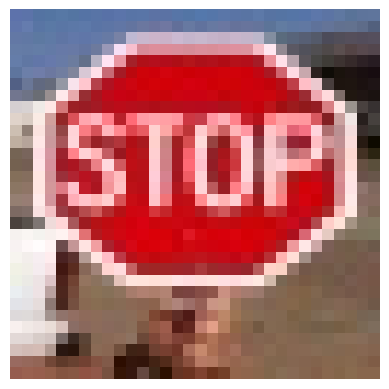

In [24]:

# Test the function
img_path = '/content/drive/MyDrive/signDataset/images.cv_smo35iz2zgxsc6iky5nb/data/test/stop_sign/01MB90O9N0J2.jpg'
prediction = predict_image(img_path)
print(f'The model predicts: {prediction}')
show_image(img_path)